Loaded file: C:/Users/bajpa/Downloads/Pt. Venkatesh Kumar Raag Durga [TubeRipper.com].wav, Sample Rate: 44100, Duration: 1106.83 seconds


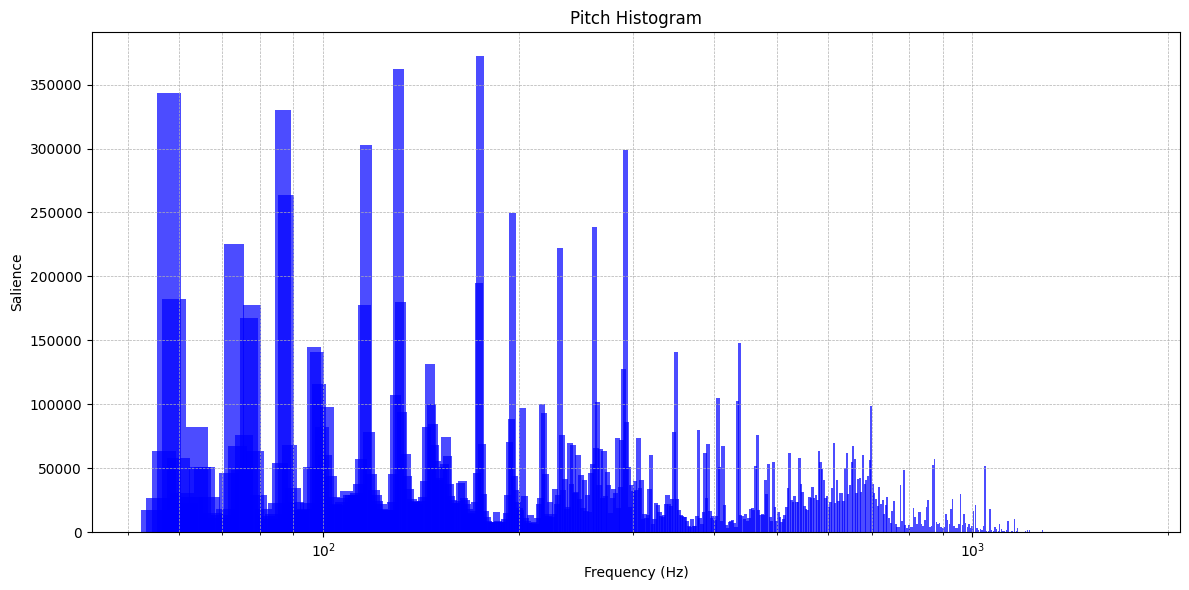

In [1]:
import librosa
import numpy as np
import scipy.signal as signal
from scipy.fftpack import fft
import matplotlib.pyplot as plt


# Step 1: Load Audio File
def load_audio(file_path, target_sr=44100):
    """
    Load an audio file and resample it to the target sample rate.
    """
    audio, sr = librosa.load(file_path, sr=target_sr, mono=True)
    print(f"Loaded file: {file_path}, Sample Rate: {sr}, Duration: {len(audio)/sr:.2f} seconds")
    return audio, sr


# Step 2: Sinusoid Extraction
# def extract_sinusoids(audio, sr, window_size=2048, hop_size=128):
#     """
#     Extract spectral peaks using the STFT.
#     """
#     hann_window = signal.windows.hann(window_size)
#     stft = np.array([fft(audio[i:i + window_size] * hann_window, n=8192)[:8192//2]
#                      for i in range(0, len(audio) - window_size, hop_size)])
#     magnitude = np.abs(stft)
    
#     # Find spectral peaks in each frame
#     peaks = []
#     for mag in magnitude:
#         peak_indices = signal.find_peaks(mag, height=0.05 * np.max(mag))[0]
#         peaks.append((peak_indices, mag[peak_indices]))
#     return peaks
def extract_sinusoids(audio, sr, window_size=2048, hop_size=512):
    """
    Extract spectral peaks using librosa's STFT implementation.
    """
    stft = librosa.stft(audio, n_fft=8192, hop_length=hop_size, win_length=window_size, window='hann')
    magnitude = np.abs(stft)
    
    # Find spectral peaks in each frame
    peaks = []
    for mag in magnitude.T:  # Transpose to iterate over time frames
        peak_indices = signal.find_peaks(mag, height=0.05 * np.max(mag))[0]
        peaks.append((peak_indices, mag[peak_indices]))
    return peaks



# Step 3: Compute Salience Function
def compute_salience(peaks, sr, fmin=55, fmax=1760, bins_per_octave=120):
    """
    Compute a salience function from spectral peaks.
    """
    n_bins = int(np.log2(fmax / fmin) * bins_per_octave)
    salience = np.zeros((len(peaks), n_bins))
    for t, (freqs, amps) in enumerate(peaks):
        for f, a in zip(freqs, amps):
            bin_index = int(np.log2(f / fmin) * bins_per_octave)
            if 0 <= bin_index < n_bins:
                salience[t, bin_index] += a
    return salience


# Step 4: Generate Pitch Histogram
def generate_pitch_histogram(salience, bins_per_octave=120, fmin=55):
    """
    Create a pitch histogram from the salience function.
    """
    pitch_histogram = np.sum(salience, axis=0)
    freqs = fmin * (2 ** (np.arange(len(pitch_histogram)) / bins_per_octave))
    return pitch_histogram, freqs


# Step 5: Visualize Pitch Histogram
def plot_pitch_histogram(pitch_histogram, freqs):
    """
    Plot the pitch histogram.
    """
    plt.figure(figsize=(12, 6))
    plt.bar(freqs, pitch_histogram, width=5, color='blue', alpha=0.7)
    plt.xscale('log')
    plt.title("Pitch Histogram")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Salience")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tight_layout()
    plt.show()


# Main Function to Process Audio File
def process_audio(file_path):
    """
    Process an audio file to extract and display the pitch histogram.
    """
    audio, sr = load_audio(file_path)
    peaks = extract_sinusoids(audio, sr)
    salience = compute_salience(peaks, sr)
    pitch_histogram, freqs = generate_pitch_histogram(salience)
    
    # Display the pitch histogram
    plot_pitch_histogram(pitch_histogram, freqs)


# Example Script
if __name__ == "__main__":
    # Path to your audio file
    audio_file_path = "C:/Users/bajpa/Downloads/Pt. Venkatesh Kumar Raag Durga [TubeRipper.com].wav"  
    # Process the audio and display the pitch histogram
    process_audio(audio_file_path)


Loaded file: C:/Users/bajpa/Downloads/Pt. Venkatesh Kumar Raag Durga [TubeRipper.com].wav, Sample Rate: 44100, Duration: 1106.83 seconds


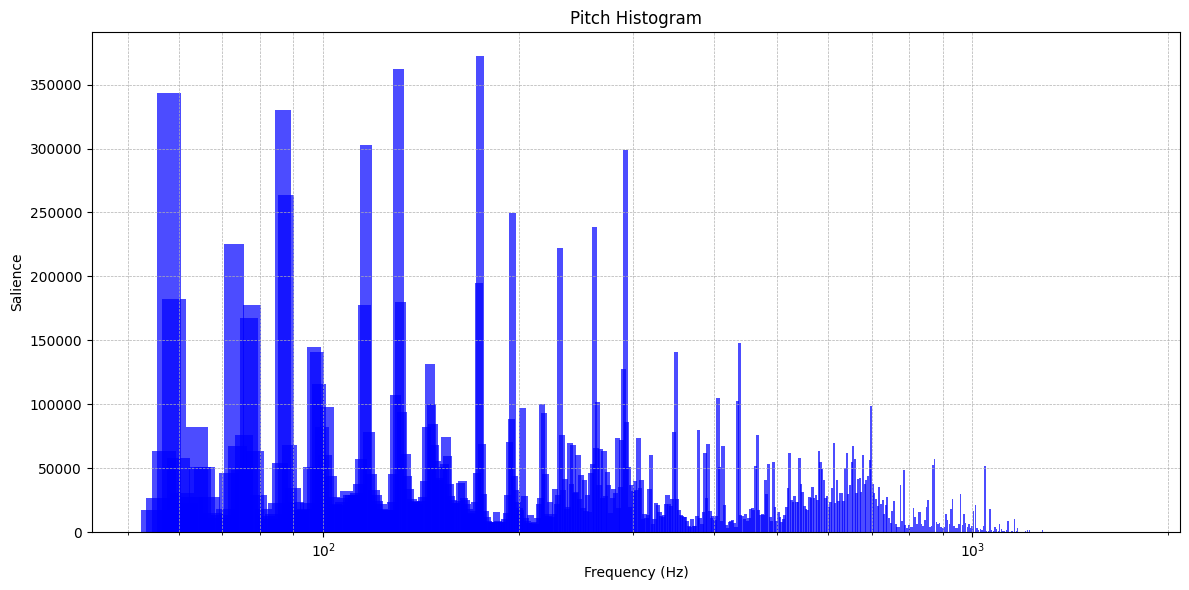

Detected Peaks (Frequency, Salience):
57.93 Hz - 0.92
63.91 Hz - 0.22
72.99 Hz - 0.61
77.78 Hz - 0.48
86.80 Hz - 0.89
96.87 Hz - 0.39
102.63 Hz - 0.12
116.54 Hz - 0.81
130.81 Hz - 0.97
145.99 Hz - 0.35
154.67 Hz - 0.20
163.86 Hz - 0.11
174.61 Hz - 1.00
196.00 Hz - 0.67
217.47 Hz - 0.27
231.74 Hz - 0.60
246.94 Hz - 0.16
261.63 Hz - 0.64
291.97 Hz - 0.80
320.24 Hz - 0.16
349.23 Hz - 0.38
378.64 Hz - 0.21
405.82 Hz - 0.28
437.47 Hz - 0.40
466.16 Hz - 0.20
493.88 Hz - 0.15
523.25 Hz - 0.17
611.56 Hz - 0.19
655.46 Hz - 0.18
698.46 Hz - 0.26
783.99 Hz - 0.13
874.93 Hz - 0.15
1046.50 Hz - 0.14
Detected Tonic Frequency: 174.61 Hz
The detected tonic frequency is 174.61 Hz


In [2]:
def detect_tonic_from_histogram(pitch_histogram, freqs):
    """
    Detect the fundamental pitch (tonic) from the pitch histogram.
    """
    # Normalize the histogram
    normalized_histogram = pitch_histogram / np.max(pitch_histogram)
    
    # Find peaks in the histogram
    peaks, _ = signal.find_peaks(normalized_histogram, height=0.1, distance=10)
    peak_frequencies = freqs[peaks]
    peak_heights = normalized_histogram[peaks]
    
    # Identify the tonic
    # The tonic is typically the most prominent peak or closely related to fifths/octaves
    tonic_index = np.argmax(peak_heights)  # Index of the highest peak
    tonic_frequency = peak_frequencies[tonic_index]
    
    print("Detected Peaks (Frequency, Salience):")
    for f, h in zip(peak_frequencies, peak_heights):
        print(f"{f:.2f} Hz - {h:.2f}")
    
    print(f"Detected Tonic Frequency: {tonic_frequency:.2f} Hz")
    return tonic_frequency


# Full Integration with Audio Processing
def process_audio_for_tonic(file_path):
    """
    Process an audio file to extract the tonic frequency.
    """
    audio, sr = load_audio(file_path)
    peaks = extract_sinusoids(audio, sr)
    salience = compute_salience(peaks, sr)
    pitch_histogram, freqs = generate_pitch_histogram(salience)
    
    # Display the pitch histogram
    plot_pitch_histogram(pitch_histogram, freqs)
    
    # Detect the tonic from the histogram
    tonic_frequency = detect_tonic_from_histogram(pitch_histogram, freqs)
    return tonic_frequency


# Example Script
if __name__ == "__main__":
    # Path to your audio file
    audio_file_path = "C:/Users/bajpa/Downloads/Pt. Venkatesh Kumar Raag Durga [TubeRipper.com].wav"

    # Process the audio and detect the tonic
    detected_tonic = process_audio_for_tonic(audio_file_path)
    print(f"The detected tonic frequency is {detected_tonic:.2f} Hz")
